In [1]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u
%matplotlib inline

import get_halpha_SB

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [19]:
import eagleSqlTools as sql

mySim = ('RefL0100N1504',100.)
con   = sql.connect("dlokhorst",password="mxdPB54Y")  

myQuery  = "SELECT \
                SH.GalaxyID, \
                SH.CentreOfPotential_x, \
                SH.CentreOfPotential_y, \
                SH.CentreOfPotential_z, \
                SH.SubGroupNumber, \
                SH.MassType_Star\
            FROM \
                %s_SubHalo as SH \
            WHERE \
                SH.SnapNum = 28 and \
                SH.MassType_Star > 1e9"%('RefL0100N1504')

myData_28 = sql.execute_query(con,myQuery)
print len(myData_28)
#x = myData['CentreOfMass_x'][:]
#y = myData['CentreOfMass_y'][:]
#z = myData['CentreOfMass_z'][:]

myQuery  = "SELECT \
                SH.GalaxyID, \
                SH.CentreOfPotential_x, \
                SH.CentreOfPotential_y, \
                SH.CentreOfPotential_z, \
                SH.SubGroupNumber, \
                SH.MassType_Star\
            FROM \
                %s_SubHalo as SH \
            WHERE \
                SH.SnapNum = 27 and \
                SH.MassType_Star > 1e9"%('RefL0100N1504')

myData_27 = sql.execute_query(con,myQuery)
print len(myData_27)

13300
13473


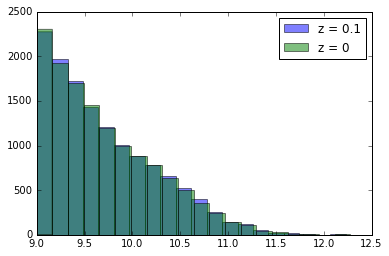

In [20]:
plt.hist(np.log10(myData_27['MassType_Star'][:]),label='z = 0.1',alpha=0.5,bins=20)
plt.hist(np.log10(myData_28['MassType_Star'][:]),label='z = 0',alpha=0.5,bins=20)
plt.legend()

Center galaxy of that potential: "subGroupNumber = 0" selected central galaxies

In [24]:
central_27 = myData_27[myData_27['SubGroupNumber']==0]
central_28 = myData_28[myData_28['SubGroupNumber']==0]

print(len(central_27), len(central_28))

(7649, 7482)


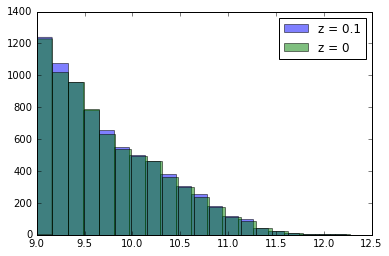

In [25]:
plt.hist(np.log10(central_27['MassType_Star'][:]),label='z = 0.1',alpha=0.5,bins=20)
plt.hist(np.log10(central_28['MassType_Star'][:]),label='z = 0',alpha=0.5,bins=20)
plt.legend()

In [26]:
np.mean(central_28['MassType_Star'][:])

1.8487777e+10

If we pretend that we choose to observe all the redshift range open to us with the filter, the total distance we range over is:

d ~ v / H_0 = (5/656.3 * 3e5 km/s) / (70 Mpc km/s) ~ 30 Mpc

The galaxies are in a 100 Mpc square box, so let's start by pruning it to 30 Mpc, then looking for galaxies in the range specified by Clampitt et al., Tanimura et al., de Graaff et al.

In [28]:
## Make Galaxy Catalogue ##

# pare down selection into box representative of survey size 
# (observable with one filter in tilting range vs observable with filter at one tilt)
# start with one 3nm filter, stack filaments inside FOV

# go through list of galaxies, look for another galaxy in specified distance range
# loop through list, searching for pair in acceptable range

# go through again and make list with only unique pairs (necessary? because may just mirror anyway)


In [ ]:
## Project Onto Same Grid ##

